Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


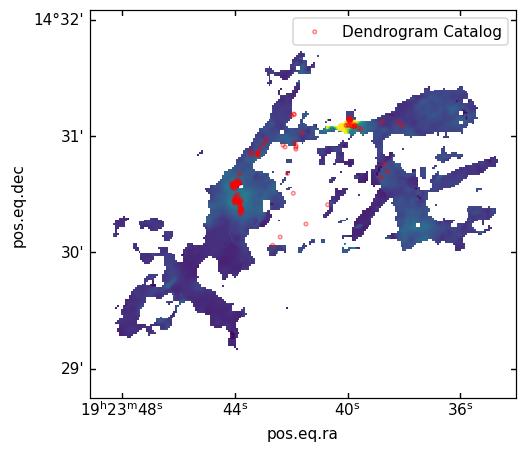

In [36]:
###Imports###
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii, fits
from astropy.wcs import WCS
from astropy import wcs
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

fp = '/Users/josh/GitHub/W51/'
###Retrieve source data###


#RUN ALMA_IMF_CAT.PY FIRST
cat_w51e = ascii.read('/Users/josh/GitHub/W51/data/W51-E.sw.sources.fin.ok_dec2020.cat', data_start=0, format='commented_header', header_start=110,  comment="!")
cat_w51irs2 = ascii.read('/Users/josh/GitHub/W51/data/W51-IRS2.sw.sources.fin.ok_dec2020.cat', data_start=0, format='commented_header', header_start=110, comment="!")


alma_imf_w51e_ra = cat_w51e['WCS_ACOOR']
alma_imf_w51e_dec = cat_w51e['WCS_DCOOR']
alma_imf_w51e_flux = cat_w51e['FXT_BST02']

alma_imf_irs2_ra = cat_w51irs2['WCS_ACOOR']
alma_imf_irs2_dec = cat_w51irs2['WCS_DCOOR']
alma_imf_irs2_flux = cat_w51irs2['FXT_BST02']



fp = '/Users/josh/GitHub/W51/'
catalog = Table.read(fp+'data/byeye_catalog.tex')
dendrocat = Table.read(fp+'data/dendro_catalog.tex')

cat_ra = [float(i) for i in catalog['PeakRA'][1:]]
cat_dec = [float(i) for i in catalog['PeakDec'][1:]]
cat_flux = catalog['peak']

dendrocat_ra = dendrocat['x_cen']
dendrocat_dec = dendrocat['y_cen']
dendrocat_flux = dendrocat['peak_cont_flux']

parmap = fits.open('/Users/josh/GitHub/W51/data/par_maps.fits')
plt.figure(figsize=(5,5), dpi=110)
ww = wcs.WCS(parmap[0].header).celestial
plt.subplot(projection=ww)
ax = plt.gca()
plt.imshow(parmap[0].data[0])
#plt.scatter(cat_ra, cat_dec, transform=ax.get_transform('world'), facecolor='none', edgecolor='red', s=5, label='By-Eye Catalog')
plt.scatter(dendrocat_ra[1:], dendrocat_dec[1:], transform=ax.get_transform('world'), facecolor='none', edgecolor='red', s=5, alpha=0.5, label='Dendrogram Catalog')
plt.xlim(50,270)
plt.ylim(50,250)
plt.tick_params(direction='in')
plt.legend()
plt.savefig('/Users/josh/GitHub/W51/fig_products/dendrocat_overlay.pdf', bbox_inches='tight')
plt.show()


<WCSAxesSubplot:>

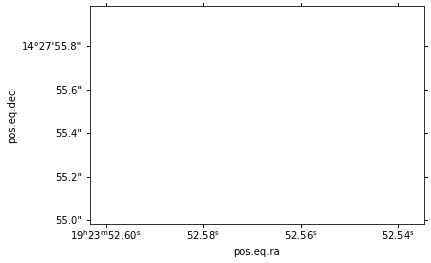

In [7]:

plt.subplot(projection=ww)

TypeError: get_transform() takes 1 positional argument but 2 were given

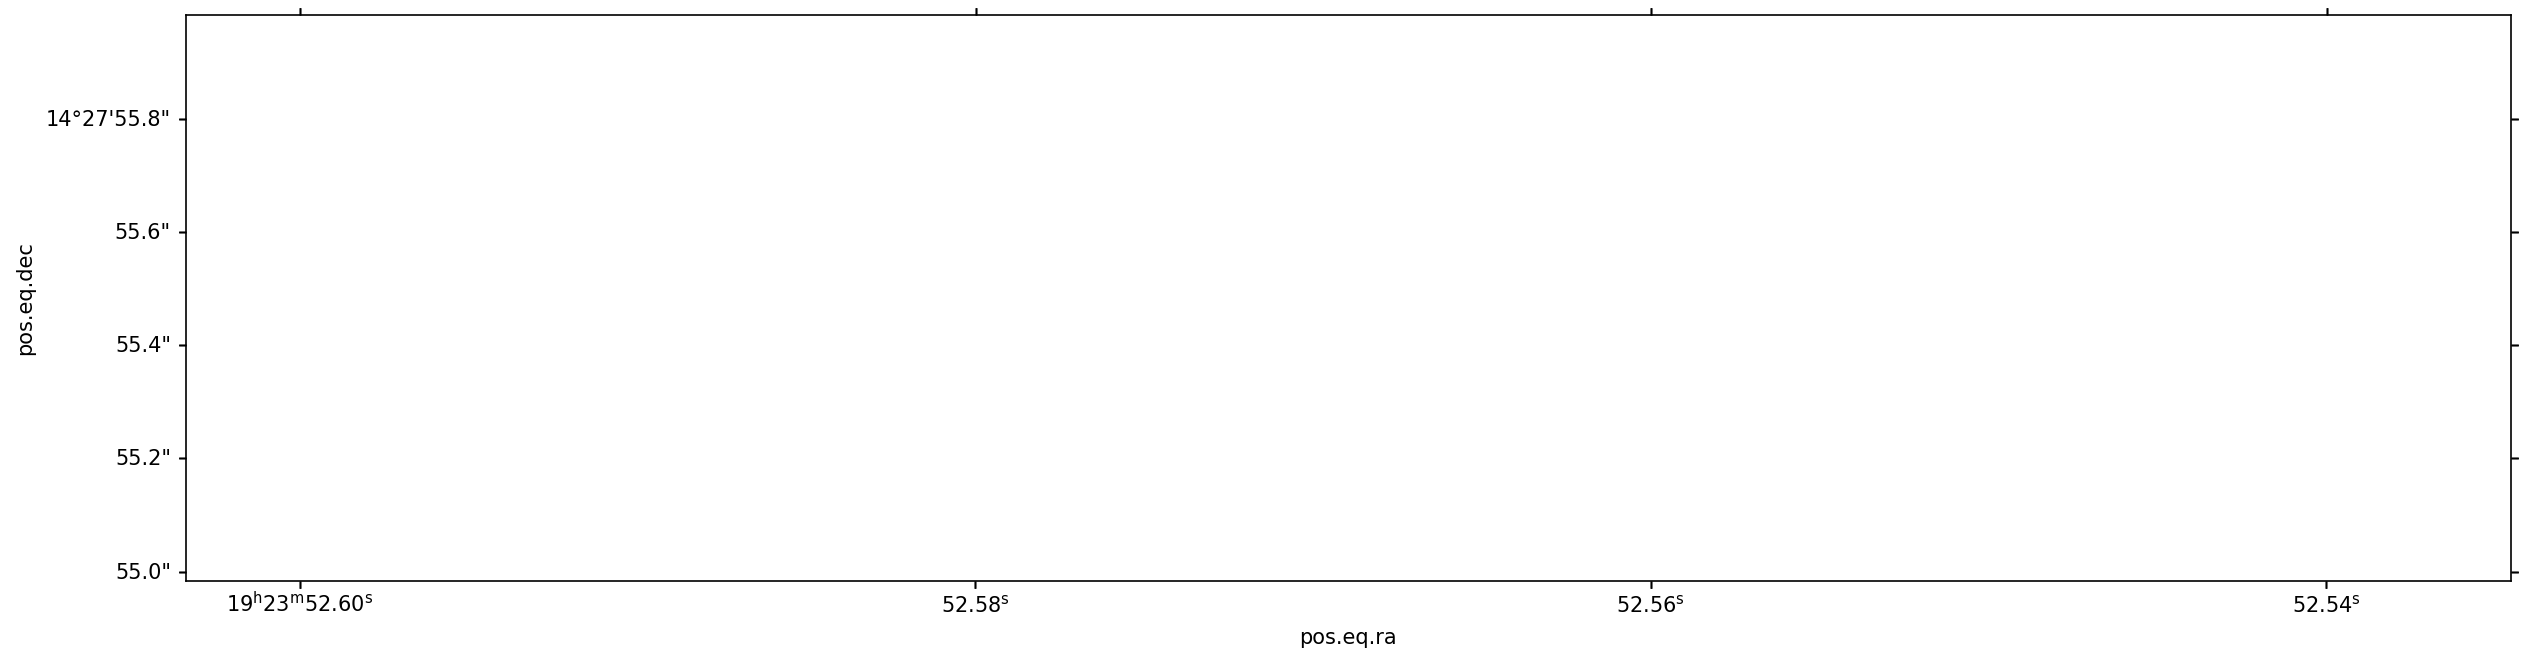

In [3]:
fig, ax = plt.subplots(1,3, figsize=(20,5), dpi=150)
ax[0].imshow(parmap[0].data[0], origin='lower')
ax[1].imshow(parmap[0].data[0], origin='lower')
ax[2].imshow(parmap[0].data[0], origin='lower')
ax_ref = plt.gca()
plt.subplot(projection=ww)
ax[0].scatter(cat_ra, cat_dec, 'r.', transform=ax_ref.get_transform('world'))

In [ ]:
fig, ax = plt.subplot(1,2)
plt.figure(figsize=(10,10), dpi=150, subplots=(3,1))
plt.subplot(projection=ww)
ax = plt.gca()
plt.imshow(parmap[0].data[0])
plt.scatter(cat_ra, cat_dec, 'r.', transform=ax.get_transform('world'))
plt.scatter(dendrocat_ra[1:], dendrocat_dec[1:], edgecolor='r', alpha=0.6, facecolor='none', transform=ax.get_transform('world'))
plt.xlim(55,270)
plt.ylim(50,250)
plt.tick_params(direction='in')
plt.show()